In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn import metrics
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

### Reading Training data

In [2]:
df1=pd.read_csv("./processed/training/engaged.csv")
df2=pd.read_csv("./processed/training/notEngaged.csv")
dff=pd.read_csv("./TopFeatures.csv")

In [3]:
dft=pd.concat([df1,df2])

In [4]:
feat=dff.to_numpy()
feat=feat.reshape(-1)

In [5]:
print(feat)

[' AU12_c' ' AU04_c' ' AU04_r' ' AU12_r' ' AU05_c' ' AU14_c' ' AU06_c'
 ' AU10_c' ' AU14_r' ' p_2' ' AU06_r' ' p_8' ' AU07_r' ' AU10_r' ' p_0'
 ' p_10' ' p_7' ' p_6' ' AU01_r' ' p_23' ' p_12' ' AU26_r' ' AU25_r'
 ' p_5' ' AU45_r' ' p_20' ' AU09_r' ' AU17_r' ' p_24' ' p_9' ' AU05_r'
 ' p_11' ' p_18' ' AU15_c' ' p_16' ' AU23_r' ' p_27' ' p_3' ' p_13'
 ' p_26' ' AU02_r' ' p_15' ' p_19' ' p_21' ' AU20_r' ' AU15_r' ' p_30'
 ' p_1' ' gaze_1_z' ' p_31']


In [6]:
y_train=dft["Result"]
x_train=dft.drop("Result",axis=1)
x_train=x_train[feat]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train,test_size=0.35)

In [8]:
X_train

,AU12_c,AU04_c,AU04_r,AU12_r,AU05_c,AU14_c,AU06_c,AU10_c,AU14_r,p_2,...,AU02_r,p_15,p_19,p_21,AU20_r,AU15_r,p_30,p_1,gaze_1_z,p_31
11641,0.0,1.0,0.03,0.00,0.0,0.0,0.0,0.0,0.41,-9.457,...,0.13,0.257,-0.279,-0.230,0.07,0.00,0.001,4.240,-0.989052,0.009
5067,0.0,0.0,0.62,0.26,0.0,0.0,0.0,0.0,0.50,-10.186,...,0.12,0.334,0.162,0.072,0.00,0.00,-0.005,6.307,-0.987203,0.016
6382,0.0,0.0,0.00,0.19,0.0,0.0,0.0,0.0,0.00,-16.747,...,0.28,-0.134,0.097,0.312,0.00,0.11,0.024,-1.688,-0.952724,-0.019
10883,0.0,0.0,0.30,0.00,0.0,0.0,0.0,1.0,0.00,-4.280,...,0.00,0.129,-0.040,-0.107,0.12,0.00,-0.004,1.928,-0.988507,0.009
5093,0.0,0.0,0.48,0.41,0.0,0.0,0.0,0.0,1.10,12.464,...,0.15,0.492,-0.594,0.028,0.00,0.00,0.009,-5.261,-0.949821,-0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10636,0.0,0.0,0.19,0.16,1.0,0.0,0.0,0.0,0.45,-11.390,...,0.37,0.476,-0.032,0.092,0.00,0.06,0.009,-5.168,-0.954680,0.007
2669,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,-12.855,...,0.38,1.274,-0.106,0.104,0.21,0.01,0.011,-6.485,-0.966788,0.017
5324,0.0,0.0,0.00,0.70,0.0,0.0,0.0,0.0,0.08,3.850,...,0.15,0.234,-0.031,0.094,0.00,0.00,-0.002,-12.255,-0.964518,-0.004
5859,0.0,0.0,0.52,0.74,0.0,0.0,0.0,0.0,0.39,3.821,...,0.43,-0.151,-0.051,0.524,0.36,0.43,0.003,1.247,-0.938423,0.008


In [9]:
model=tree.DecisionTreeClassifier()

### Training of the given model

In [10]:
model = model.fit(X_train, Y_train)

In [11]:
target_names = ['Not Engaged','Engaged']
claf_report=classification_report(Y_test,model.predict(X_test),target_names=target_names,output_dict=True)
print(claf_report)

{'Not Engaged': {'precision': 0.6490665110851809, 'recall': 0.6406564929455801, 'f1-score': 0.6448340820170989, 'support': 3473}, 'Engaged': {'precision': 0.7092264678471575, 'recall': 0.7167412291028962, 'f1-score': 0.7129640473123315, 'support': 4247}, 'accuracy': 0.6825129533678757, 'macro avg': {'precision': 0.6791464894661692, 'recall': 0.6786988610242382, 'f1-score': 0.6788990646647153, 'support': 7720}, 'weighted avg': {'precision': 0.6821622800447812, 'recall': 0.6825129533678757, 'f1-score': 0.682314388054515, 'support': 7720}}


In [12]:
helix=pd.read_csv("./TopFeatures.csv")
h2=pd.read_csv("./heatMaps.csv")
helix['value']=h2
#print(helix)
helix.to_csv("Finalmaps.csv",index=None,header=None)

g1=pd.read_csv("./Finalmaps.csv",index_col=None)
h6=helix['value'].to_numpy()
h6=np.reshape(h6, (50, 1)) # C-like index ordering
#print(h6)

## HeatMap

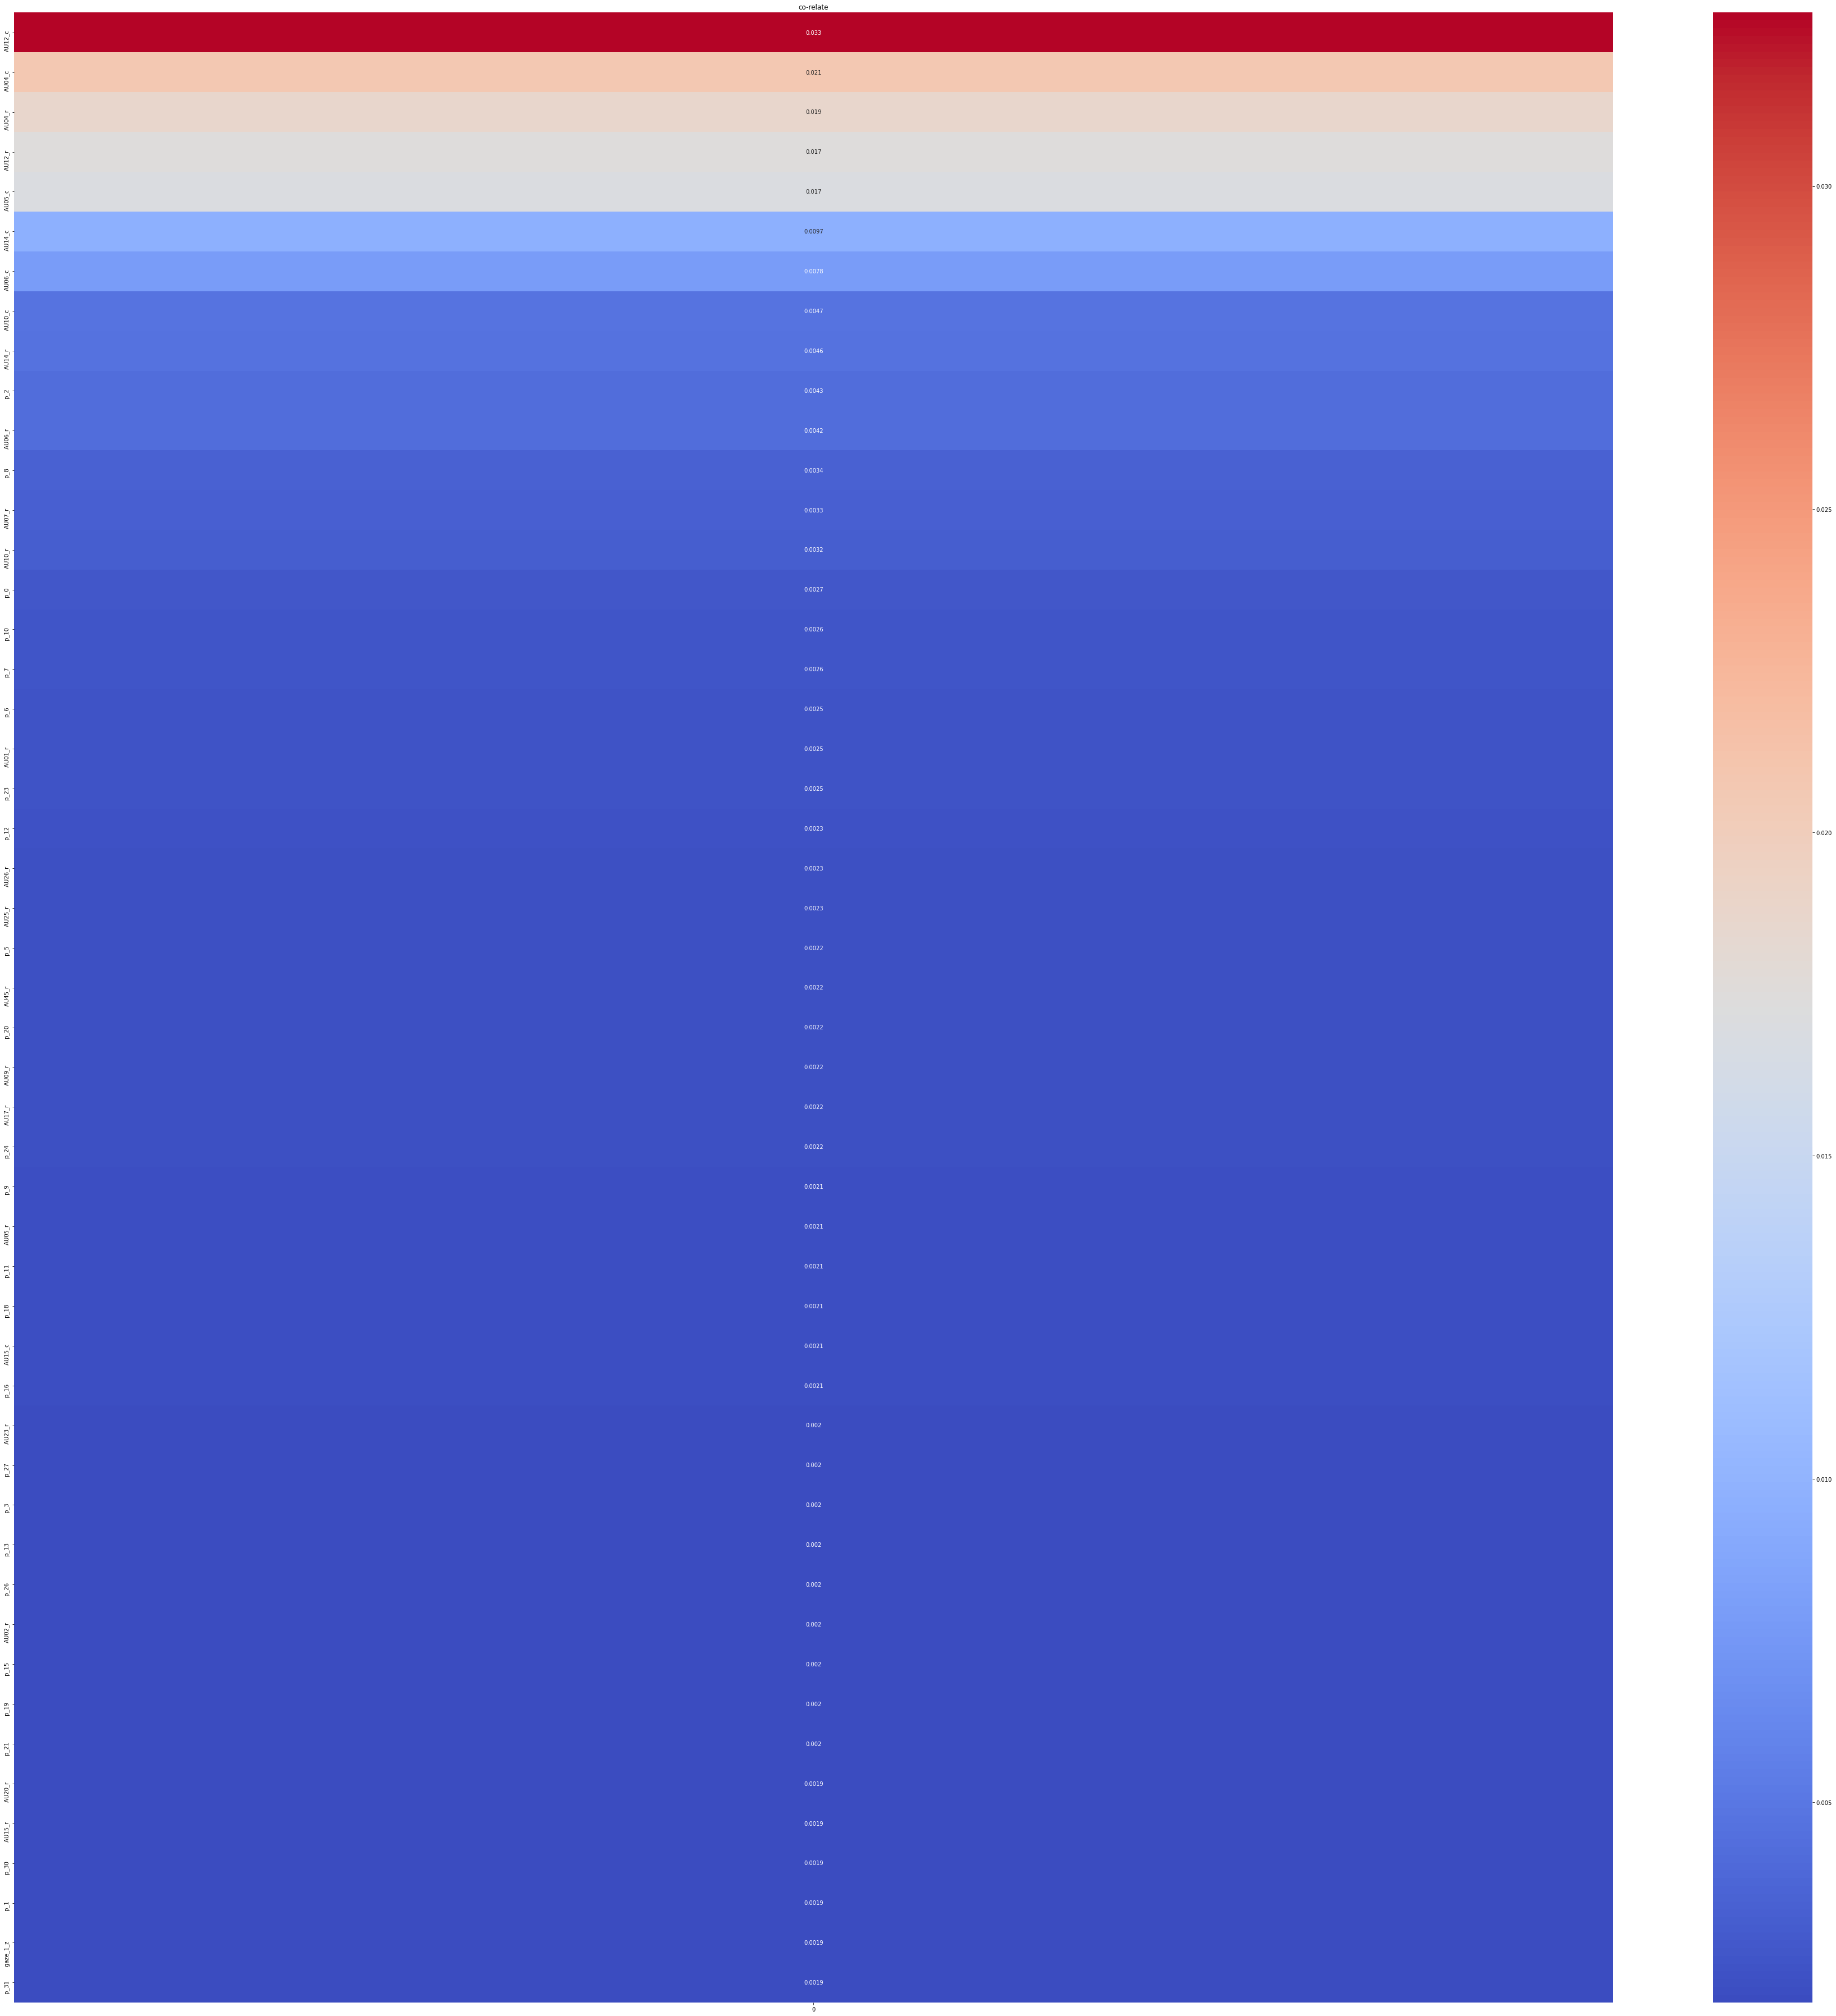

In [13]:
plt.figure(figsize=(50,50))

ax=sns.heatmap(h6, annot=True, cmap="coolwarm", yticklabels=helix['0']).set_title('co-relate')
plt.tight_layout()
plt.show()

<AxesSubplot:>

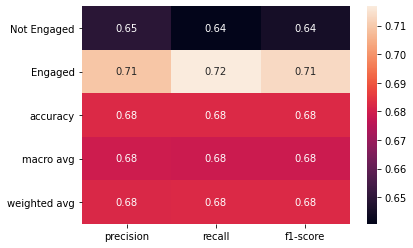

In [14]:
sns.heatmap(pd.DataFrame(claf_report).iloc[:-1, :].T, annot=True)

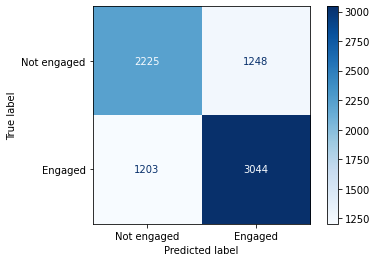

In [15]:
metrics.plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, display_labels=['Not engaged', 'Engaged'])

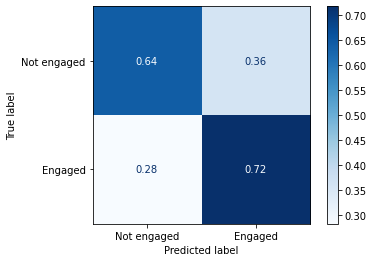

In [16]:
metrics.plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, display_labels=['Not engaged', 'Engaged'], normalize='true')

### Fitting the model on complete data

In [17]:
model = model.fit(x_train, y_train)

### Saving the Model

In [18]:
patho=r'./models'
joblib.dump(model, (os.path.join(patho,r''+'model_joblib_decision_tree')))

['./models/model_joblib_decision_tree']

In [19]:
plt.close()

In [20]:
tree.export_graphviz(model,
                     out_file="tree.dot",
                     feature_names = feat, 
                     class_names=["Not Engaged","Engaged"],
                     filled = True)